<a href="https://colab.research.google.com/github/raviyadav44/Different_EDA_techiniques/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Discussion Related with Outlier And Impact On Machine Learning!!

Outliers are important :--
* in anomaly detection,fraud detection
* medical usecases like cancer
* sales predections

should Outliers me remove :--

* depending on domain to domain.
-- sales predection-keep



###Which ML Models are Sensitive to Outliers

1. Navie Bayes Classifier---NO
2. SVM---NO
3. Linear regression---YES
4. Logistic Regression---YES
5. Decision Tree Regressor or classifier---NO
6. Ensemle(RF,XGBoost,GB)---NO
7. KNN---NO
8. KMeans---YES
9. Hierarichal---YES
10. PCA---YES[very very senstive]
11. Neural networks---YES
12. LDA---YES
13. DBSCAN---YES

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/MyDrive/titanic/titanic.csv")

In [ ]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['age'].isnull().sum()

177

In [ ]:
import seaborn as sns

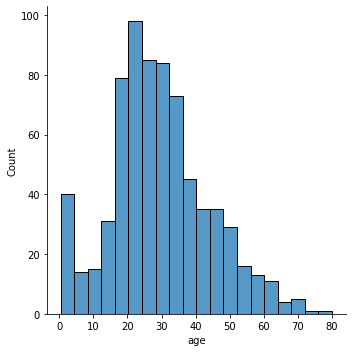

In [ ]:
sns.displot(df['age'].dropna())

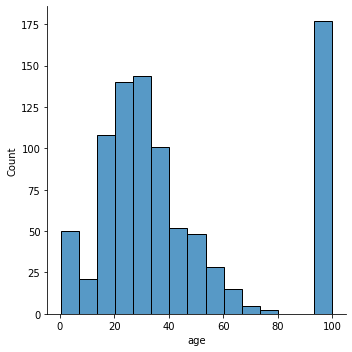

In [ ]:
sns.displot(df['age'].fillna(100))

For normal distribution data we will be using 
--- Estimate Outlier aka [extreme value analysis]


#GUSSIAN DISTRIBUTION

for guassian distribution we are using -
*  THREE STANDARD DEVIATION

Text(0, 0.5, 'No of passenger')

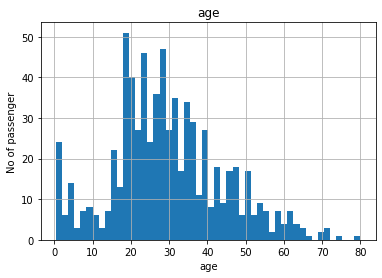

In [ ]:
figure=df.age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('No of passenger')

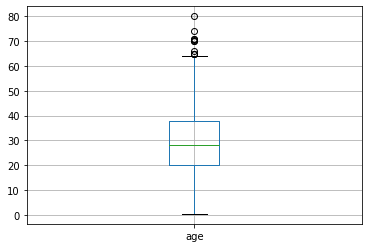

In [ ]:
figure=df.boxplot(column='age')

In [ ]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

###Assuming age follows a gussian distribution we will calculate the boundaries with differentiates the outliers

In [ ]:
upper_boundary=df['age'].mean()+ 3*df['age'].std()
lower_boundary=df['age'].mean()- 3*df['age'].std()

In [ ]:
upper_boundary

73.27860964406095

In [ ]:
lower_boundary

-13.88037434994331

so for gaussian distribution any points apart from upper and lowe boundary is consider as an outlier.

##Features are skewed

Text(0, 0.5, 'No of passenger')

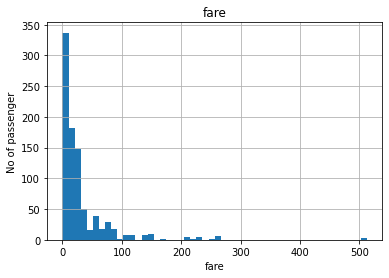

In [ ]:
figure=df.fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('fare')
figure.set_ylabel('No of passenger')

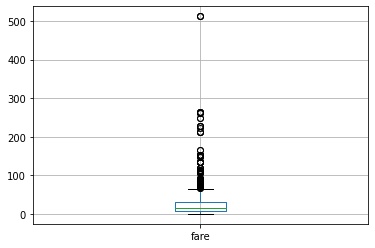

In [ ]:
figure=df.boxplot(column='fare')

In [ ]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [ ]:
IQR=df.fare.quantile(0.75)-df.fare.quantile(0.25)
IQR

23.0896

In [ ]:
lower_bridge=df['fare'].quantile(0.25)-1.5*(IQR)
upper_bridge=df['fare'].quantile(0.75)+1.5*(IQR)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

but we wont consider the above code for in skewed data

In [ ]:
#Extreme outliers
lower_bridge=df['fare'].quantile(0.25)-3*(IQR)
upper_bridge=df['fare'].quantile(0.75)+3*(IQR)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [ ]:
data=df.copy()

In [ ]:
data.loc[data['age']>=73,'age']=73

In [ ]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.loc[data['fare']>=100,'fare']=100

In [ ]:
data.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
